In [42]:
# for database connections
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [10]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres"
SQL_IP = "localhost"
PORT = 5432
DATABASE = "crowdfunding"

In [11]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [12]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contacts_df
contact_id INTEGER
first_name VARCHAR(250)
last_name VARCHAR(250)
email VARCHAR(250)

campaign_df
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(250)
description VARCHAR(250)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(250)
backers_count INTEGER
country VARCHAR(250)
currency VARCHAR(10)
launch_date TIMESTAMP
end_date TIMESTAMP
category_id VARCHAR(50)
subcategory_id VARCHAR(250)

category_df
category_id VARCHAR(50)
category VARCHAR(250)

subcategory_df
subcategory_id VARCHAR(50)
subcategory VARCHAR(250)



In [13]:
contacts_df = pd.read_csv("../Starter_Files/Resources/contacts.csv")
contacts_df.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [14]:
contacts_df.to_sql("contacts_df", schema="public", con=engine, index=False, if_exists="append", method="multi")

1000

In [15]:
category_df = pd.read_csv("../Starter_Files/Resources/category.csv")
category_df.head()

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video


In [16]:
category_df.to_sql("category_df", schema="public", con=engine, index=False, if_exists="append", method="multi")

9

In [17]:
subcategory_df = pd.read_csv("../Starter_Files/Resources/subcategory.csv")
subcategory_df.head()

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary


In [18]:
subcategory_df.to_sql("subcategory_df", schema="public", con=engine, index=False, if_exists="append", method="multi")

24

In [19]:
campaign_df = pd.read_csv("../Starter_Files/Resources/campaign.csv")
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,2020-06-20 05:00:00,2021-01-30 06:00:00,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,2020-11-29 06:00:00,2021-06-11 05:00:00,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process impro...,142400.0,21307.0,failed,296,US,USD,2020-05-05 05:00:00,2021-05-30 05:00:00,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,2021-01-29 06:00:00,2021-02-13 06:00:00,cat1,subcat1


In [20]:
campaign_df.to_sql("campaign_df", schema="public", con=engine, index=False, if_exists="append", method="multi")

1000

In [1]:
# outcome vs duration of campaign

In [23]:
df2 = campaign_df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cf_id           1000 non-null   int64  
 1   contact_id      1000 non-null   int64  
 2   company_name    1000 non-null   object 
 3   description     1000 non-null   object 
 4   goal            1000 non-null   float64
 5   pledged         1000 non-null   float64
 6   outcome         1000 non-null   object 
 7   backers_count   1000 non-null   int64  
 8   country         1000 non-null   object 
 9   currency        1000 non-null   object 
 10  launch_date     1000 non-null   object 
 11  end_date        1000 non-null   object 
 12  category_id     1000 non-null   object 
 13  subcategory_id  1000 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 109.5+ KB


In [26]:
# convert objects into datetime data types
df2["end_date"] = pd.to_datetime(df2.end_date)
df2["launch_date"] = pd.to_datetime(df2.launch_date)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cf_id           1000 non-null   int64         
 1   contact_id      1000 non-null   int64         
 2   company_name    1000 non-null   object        
 3   description     1000 non-null   object        
 4   goal            1000 non-null   float64       
 5   pledged         1000 non-null   float64       
 6   outcome         1000 non-null   object        
 7   backers_count   1000 non-null   int64         
 8   country         1000 non-null   object        
 9   currency        1000 non-null   object        
 10  launch_date     1000 non-null   datetime64[ns]
 11  end_date        1000 non-null   datetime64[ns]
 12  category_id     1000 non-null   object        
 13  subcategory_id  1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(7)
mem

In [46]:
duration_list = []

for index, row in df2.iterrows():
    duration = (row["end_date"] - row["launch_date"]).days
    duration_list.append(duration)

df2["duration"] = duration_list

df2.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id,duration
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1,382
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,2020-06-20 05:00:00,2021-01-30 06:00:00,cat1,subcat1,224
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,2020-11-29 06:00:00,2021-06-11 05:00:00,cat1,subcat1,193
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process impro...,142400.0,21307.0,failed,296,US,USD,2020-05-05 05:00:00,2021-05-30 05:00:00,cat1,subcat1,390
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,2021-01-29 06:00:00,2021-02-13 06:00:00,cat1,subcat1,15


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cf_id           1000 non-null   int64         
 1   contact_id      1000 non-null   int64         
 2   company_name    1000 non-null   object        
 3   description     1000 non-null   object        
 4   goal            1000 non-null   float64       
 5   pledged         1000 non-null   float64       
 6   outcome         1000 non-null   object        
 7   backers_count   1000 non-null   int64         
 8   country         1000 non-null   object        
 9   currency        1000 non-null   object        
 10  launch_date     1000 non-null   datetime64[ns]
 11  end_date        1000 non-null   datetime64[ns]
 12  category_id     1000 non-null   object        
 13  subcategory_id  1000 non-null   object        
 14  duration        1000 non-null   int64         
dtypes: da

In [65]:
import matplotlib.patches as mpatches

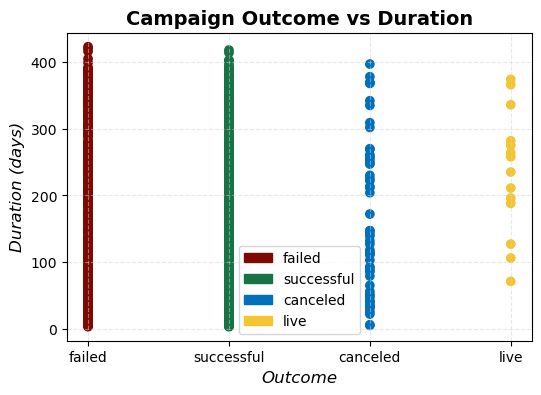

In [74]:
# Graph_1: Not useful

x = df2.outcome
y = df2.duration
colors = {"failed": "#7C0902",
          "successful": "#177245",
          "canceled": "#0070BB",
          "live": "#F4C431"}
df2["color"] = df2.outcome.map(colors)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color=df2.color)
legend_info = [mpatches.Patch(color=color, label=outcome) for outcome, color in colors.items()]

plt.xlabel("Outcome", fontsize=12, fontstyle="italic")
plt.ylabel("Duration (days)", fontsize=12, fontstyle="italic")
plt.title("Campaign Outcome vs Duration", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.legend(handles=legend_info)
plt.show()

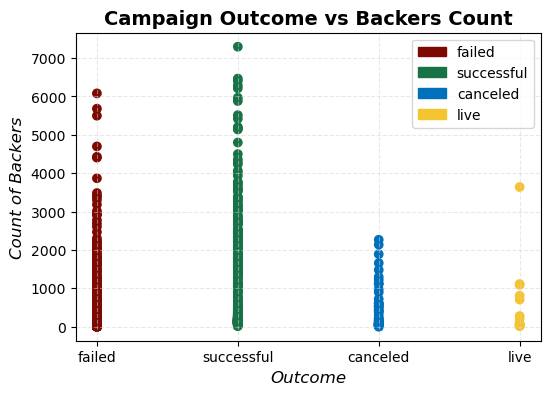

In [75]:
# Graph_2: Possibly useful

x = df2.outcome
y = df2.backers_count
colors = {"failed": "#7C0902",
          "successful": "#177245",
          "canceled": "#0070BB",
          "live": "#F4C431"}
df2["color"] = df2.outcome.map(colors)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color=df2.color)
legend_info = [mpatches.Patch(color=color, label=outcome) for outcome, color in colors.items()]

plt.xlabel("Outcome", fontsize=12, fontstyle="italic")
plt.ylabel("Count of Backers", fontsize=12, fontstyle="italic")
plt.title("Campaign Outcome vs Backers Count", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.legend(handles=legend_info)
plt.show()

In [76]:
df2["percent_funded"] = round(((df2.pledged / df2.goal) * 100), 2)
df2.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id,duration,percent_funded,color
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1,382,0.00,#7C0902
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,2020-06-20 05:00:00,2021-01-30 06:00:00,cat1,subcat1,224,443.94,#177245
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,2020-11-29 06:00:00,2021-06-11 05:00:00,cat1,subcat1,193,926.69,#177245
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process impro...,142400.0,21307.0,failed,296,US,USD,2020-05-05 05:00:00,2021-05-30 05:00:00,cat1,subcat1,390,14.96,#7C0902
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,2021-01-29 06:00:00,2021-02-13 06:00:00,cat1,subcat1,15,376.88,#177245


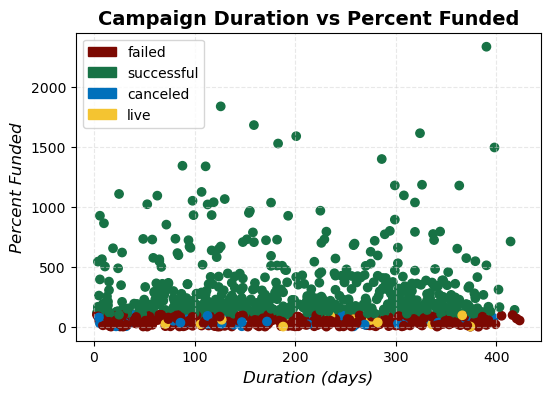

In [77]:
# Graph_3: Possibly useful

x = df2.duration
y = df2.percent_funded
colors = {"failed": "#7C0902",
          "successful": "#177245",
          "canceled": "#0070BB",
          "live": "#F4C431"}
df2["color"] = df2.outcome.map(colors)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color=df2.color)
legend_info = [mpatches.Patch(color=color, label=outcome) for outcome, color in colors.items()]

plt.xlabel("Duration (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Percent Funded", fontsize=12, fontstyle="italic")
plt.title("Campaign Duration vs Percent Funded", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.legend(handles=legend_info)
plt.show()

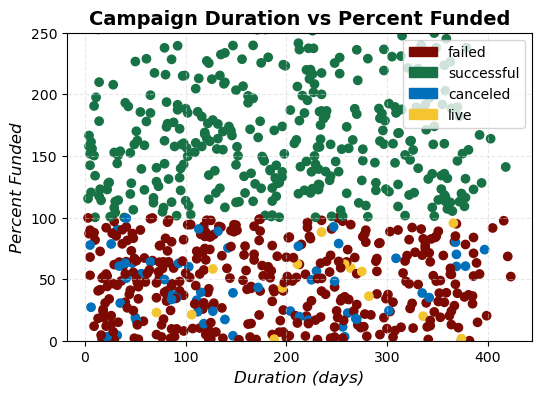

In [78]:
# Graph_4: Zoom in on Graph_3, Most useful

x = df2.duration
y = df2.percent_funded
colors = {"failed": "#7C0902",
          "successful": "#177245",
          "canceled": "#0070BB",
          "live": "#F4C431"}
df2["color"] = df2.outcome.map(colors)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color=df2.color)
legend_info = [mpatches.Patch(color=color, label=outcome) for outcome, color in colors.items()]
plt.ylim(0, 250)

plt.xlabel("Duration (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Percent Funded", fontsize=12, fontstyle="italic")
plt.title("Campaign Duration vs Percent Funded", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.legend(handles=legend_info)
plt.show()